## Lesson 2 - The Riemann zeta function

### Learning Outcomes:

**Python**:
- for loops
- range
- list comprehensions
**SageMath**:
- plotting in 1-d

## Mathematical problem:

The Riemann zeta function $\zeta(s)$ is defined for $s$ with real part greater than $1$ by 
$$
 \zeta(s) = 1+2^{-s} + 3^{-s} \cdots = \sum_{n=1}^{\infty} n^{-s}
$$
and it is known that 
1. $\zeta(s)$ can be extended to an analytic (holomorphic) function in the entire complex plane except for a simple pole with residue 1 at $s=1$.
2. $\zeta(s)$ satisfies a functional equation when reflecting in the line $\Re(s)=1/2$ of the form 
$$
\zeta(s) = 2^s \pi^{s-1} \sin(\pi s/2) \Gamma(1-s) \zeta(1-s)
$$
3. $\zeta(-2n)=0$ for each positive integer $n$ (these are called trivial zeros)

One of the main unsolved problems in number theory today is the **Riemann Hypothesis** which states that all non-trivial zeros of $\zeta(s)$ lie on the line $\Re(s)=1/2$.

The evidence for this conjecture is mainly experimental and has been verified up to a very large height. 

The main aim with the next few sessions is to study the Riemann zeta function and its zeros and (ideally) be able to verify the Riemann Hypothesis up to some height. 



## Python Control Structures
Standard (used in most programming languages):
- For/while loops
- If-then-else statements
More Python specific:
- Generator expressions
- List comprehensions


In [24]:
# For loops goes over a range of  integers.
range(5,12)

range(5, 12)

In [25]:
list(range(5,12)) # Note it starts at the left endpoint and stops one step before the final endpoint!

[5, 6, 7, 8, 9, 10, 11]

In [26]:
# A range is an example of a generator expression -- it does not actually allocate all elements until needed.
# list(range(10^(10^10))) would run out of memory but iterating over it is fine (although probably won't finish)
# If evaluating this cell: please call keyboard interrupt.
for i in range(10^(10^10)):
    pass

KeyboardInterrupt: 

In [27]:
# We can evaluate the zeta function at s=2 using a loop:
result = 0
for n in range(1,100):
    result += n**(-2)
print(result)

1.6348839001848923


In [28]:
# Or a list comprehension
sum([n**-2 for n in range(1,100)])

1.6348839001848923

If we want to compute partial zeta functions:
$$
\zeta_{odd} = \sum_{n=0,\, n\equiv 1\pmod{2}}^{\infty} n^{-s}\quad \zeta_{even} = \sum_{n=0,\, n\equiv 0\pmod{2}}^{\infty} n^{-s}
$$

In [29]:
# With a list comprehension
sum([n**-2 for n in range(1,100) if n % 2 == 1])

1.2287007167795103

In [30]:
# Using a range with step size 2
result = 0
for n in range(1,100,2):
    result += n**(-2)
print(result)

1.2287007167795103


In [31]:
# If we want to compute both even and odd parts we can use an if-elif-else:
result_even = 0
result_odd = 0
for n in range(1,100):
    if n % 2 == 1:
        result_odd += n**(-2)
    elif n % 2 == 0:
        result_even+= n**-2
    else:
        pass   # 
print(f"zeta_odd={result_odd}")
print(f"zeta_even={result_even}")

zeta_odd=1.2287007167795103
zeta_even=0.4061831834053823


**Exercise 3**
Write a function with the following specifications:
1. Takes an input a complex number $s$
2. Outputs an approximation of $\zeta(s)$ if $\Re(s)>1$.
3. Raises an appropriate error message if $s$ is of the wrng type or not in the correct domain.
4. Has a docstring that explains it

Hint: you might want to consider the parent of the input. 

In [44]:
def zeta_v1(s, nmax=100):
    """
    Compute the Riemann zeta function at the point s in the region of absolute convergence.
    
    INPUT:
    - ``s`` -- complex number, argument to the function
    - ``nmax`` -- integer (default=100), the number of terms to sum
    """
    if not isinstance(s,sage.rings.complex_number.ComplexNumber):
        raise ValueError(f"Input was of type {type(s)} aqnd we need a complex number!")
    if s.real() <= 1:
        raise ValueError(f"Input needs to have real part >1. Got Re(s)={s.real()}")
    CF = s.parent()
    return sum([CF(n)**-s for n in range(1,nmax)])

In [45]:
zeta_v1(CC(10,1))

1.00075907782986 - 0.000640128026785524*I

<class 'sage.rings.complex_number.ComplexNumber'>

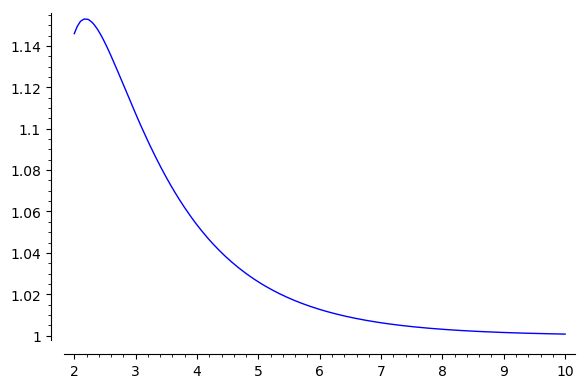

In [50]:
plot(lambda x: zeta_v1(CC(x,1)).real(),2,10)

In [23]:
show(P)

Graphics3d Object

In [24]:
import subprocess

In [26]:
print(subprocess.check_output(['java', '-version'], stderr=subprocess.STDOUT))

b'java version "10.0.1" 2018-04-17\nJava(TM) SE Runtime Environment 18.3 (build 10.0.1+10)\nJava HotSpot(TM) 64-Bit Server VM 18.3 (build 10.0.1+10, mixed mode)\n'


In [27]:
P.show( viewer='canvas3d' )

Graphics3d Object